In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path1 = 'data/Assignment 2 - new.app4.csv'
path2 = 'data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv'


In [ ]:
data_1 = pd.read_csv(path1)
data_2 = pd.read_csv(path2)

In [ ]:
data_1

,Unnamed: 0,time,W_min
0,1,6/7/2013 11:04,1142.919571
1,2,6/7/2013 11:05,371.239567
2,3,6/7/2013 11:06,367.887333
3,4,6/7/2013 11:07,702.714100
4,5,6/7/2013 11:08,1655.944450
...,...,...,...
10841,10842,9/17/2013 23:06,1.316350
10842,10843,9/17/2013 23:07,1.309550
10843,10844,9/17/2013 23:08,1.296950
10844,10845,9/17/2013 23:09,1.303717


In [ ]:
data_2

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly)
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999
8756,12/31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843
8757,12/31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092
8758,12/31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399


In [ ]:
#Processing data_1

# Transform time into datetime
data_1['time'] = pd.to_datetime(data_1['time'])

# Set 'time' as index for resampling
data_1.set_index('time', inplace=True)

# Sum data within each hour
data_1 = data_1.resample('H').sum()

# Create a formatted timestamp from the index (which is now resampled datetime)
data_1['formatted_timestamp'] = data_1.index.strftime('%m/%d %H:%M:%S')

# Set formatted_timestamp for merge (if you need it as index)
data_1.set_index('formatted_timestamp', inplace=True)

#Transform W into KW
data_1['kW'] = data_1['W_min'] / 1000


In [ ]:
data_1.head(25)

,Unnamed: 0,W_min,kW
formatted_timestamp,,,
06/07 11:00:00,1596,57388.943382,57.388943
06/07 12:00:00,5190,27227.961318,27.227961
06/07 13:00:00,8790,111476.298141,111.476298
06/07 14:00:00,12390,109021.960420,109.021960
06/07 15:00:00,15990,5773.963306,5.773963
06/07 16:00:00,19590,1619.193302,1.619193
06/07 17:00:00,23190,12081.027431,12.081027
06/07 18:00:00,26790,25478.736439,25.478736
06/07 19:00:00,30390,11360.620516,11.360621


In [ ]:
#Processing data_2
data_2['Date/Time'] = '2000/' + data_2['Date/Time'].str.replace('24:00:00', '00:00:00').str.strip()
data_2['Date/Time'] = pd.to_datetime(data_2['Date/Time'], format='%Y/%m/%d %H:%M:%S')

mask = data_2['Date/Time'].dt.time == pd.Timestamp('00:00:00').time()
data_2.loc[mask, 'Date/Time'] += pd.Timedelta(days=1)

data_2['hour'] = data_2['Date/Time'].dt.hour
data_2['weekday'] = data_2['Date/Time'].dt.weekday
data_2['month'] = data_2['Date/Time'].dt.month

data_2.set_index('Date/Time', inplace=True)
data_2['formatted_timestamp'] = data_2.index.strftime('%m/%d %H:%M:%S')
data_2.set_index('formatted_timestamp', inplace=True)



In [ ]:
#Merge
merged_data = pd.merge(data_1, data_2, left_index=True, right_index=True, how='right')


In [ ]:
#Drop two columns
complete_df = merged_data.drop(columns=['Unnamed: 0','W_min'])
complete_df

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month
formatted_timestamp,,,,,,,,,,,,,,,,,
01/01 01:00:00,NaN,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,5,1
01/01 02:00:00,NaN,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,2,5,1
01/01 03:00:00,NaN,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,3,5,1
01/01 04:00:00,NaN,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,4,5,1
01/01 05:00:00,NaN,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 20:00:00,NaN,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,20,6,12
12/31 21:00:00,NaN,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,21,6,12
12/31 22:00:00,NaN,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,22,6,12


In [ ]:
complete_df['Total_Hourly_Consumption'] = complete_df.sum(axis=1)

In [ ]:
complete_df

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption
formatted_timestamp,,,,,,,,,,,,,,,,,,
01/01 01:00:00,NaN,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,5,1,18.035430
01/01 02:00:00,NaN,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,2,5,1,19.496637
01/01 03:00:00,NaN,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,3,5,1,20.757447
01/01 04:00:00,NaN,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,4,5,1,21.885034
01/01 05:00:00,NaN,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,5,5,1,23.323477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 20:00:00,NaN,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,20,6,12,43.230105
12/31 21:00:00,NaN,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,21,6,12,43.920653
12/31 22:00:00,NaN,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,22,6,12,44.441100


# Abnormal Detection

## Appliance’s electricity consumption

In [ ]:
#abnormal detection
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

# Focus on Applicance features
columns = [
    'Electricity:Facility [kW](Hourly)', 'Gas:Facility [kW](Hourly)',
    'Heating:Electricity [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)', 'HVACFan:Fans:Electricity [kW](Hourly)',
    'Electricity:HVAC [kW](Hourly)', 'Fans:Electricity [kW](Hourly)',
    'General:InteriorLights:Electricity [kW](Hourly)', 'General:ExteriorLights:Electricity [kW](Hourly)',
    'Appl:InteriorEquipment:Electricity [kW](Hourly)', 'Misc:InteriorEquipment:Electricity [kW](Hourly)',
    'Water Heater:WaterSystems:Electricity [kW](Hourly) '
]
detection_data = complete_df[columns]

# Standarlize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
detection_data_scaled = scaler.fit_transform(detection_data)

# Mean and Coveriance
mu = np.mean(detection_data_scaled, axis=0)
cov = np.cov(detection_data_scaled, rowvar=False)

# Multivariate Gaussian Distribution model
model = multivariate_normal(mean=mu, cov=cov,allow_singular=True)

# Compute P-value
p_values = model.pdf(detection_data_scaled)

# Set threshold
threshold = np.percentile(p_values, 1)  # Set 1%

# Mark outliers
outliers = p_values < threshold

# Result
detection_data['outlier'] = outliers
print(detection_data[detection_data['outlier'] == True])


                     Electricity:Facility [kW](Hourly)  \
formatted_timestamp                                      
02/03 19:00:00                                2.606842   
02/04 05:00:00                                0.940006   
02/04 07:00:00                                1.828694   
02/04 08:00:00                                2.217436   
02/04 19:00:00                                2.695022   
...                                                ...   
11/22 19:00:00                                2.433703   
12/22 19:00:00                                1.946927   
12/23 19:00:00                                1.941934   
12/24 19:00:00                                1.958562   
12/25 19:00:00                                1.977526   

                     Gas:Facility [kW](Hourly)  \
formatted_timestamp                              
02/03 19:00:00                        8.505830   
02/04 05:00:00                       11.872530   
02/04 07:00:00                       11.98670

/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [ ]:
detection_data[detection_data['outlier']==True].head(50)

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),outlier
formatted_timestamp,,,,,,,,,,,,,,
02/03 19:00:00,2.606842,8.505830,0.0,8.462487,0.000000,0.210252,0.210252,0.210252,0.580410,0.125036,0.398174,0.629263,0.617063,True
02/04 05:00:00,0.940006,11.872530,0.0,11.848259,0.000000,0.291574,0.291574,0.291574,0.061986,0.013353,0.065743,0.352374,0.138332,True
02/04 07:00:00,1.828694,11.986702,0.0,11.955408,0.000000,0.293716,0.293716,0.293716,0.129606,0.027921,0.140300,0.454329,0.766178,True
02/04 08:00:00,2.217436,11.350599,0.0,11.317347,0.000000,0.276458,0.276458,0.276458,0.259212,0.055841,0.228479,0.482758,0.883043,True
02/04 19:00:00,2.695022,7.954755,0.0,7.911412,0.000000,0.196731,0.196731,0.196731,0.580410,0.125036,0.432484,0.629263,0.684453,True
02/05 02:00:00,0.969304,11.848237,0.0,11.822353,0.000000,0.291125,0.291125,0.291125,0.090161,0.019423,0.076100,0.375793,0.100058,True
02/05 03:00:00,0.908024,12.214008,0.0,12.188424,0.000000,0.299528,0.299528,0.299528,0.061986,0.013353,0.062242,0.371436,0.082835,True
02/05 04:00:00,0.903735,12.407281,0.0,12.382057,0.000000,0.303993,0.303993,0.303993,0.061986,0.013353,0.053895,0.366208,0.087657,True
02/05 05:00:00,0.955002,12.532119,0.0,12.507848,0.000000,0.306600,0.306600,0.306600,0.061986,0.013353,0.065743,0.352374,0.138302,True


/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

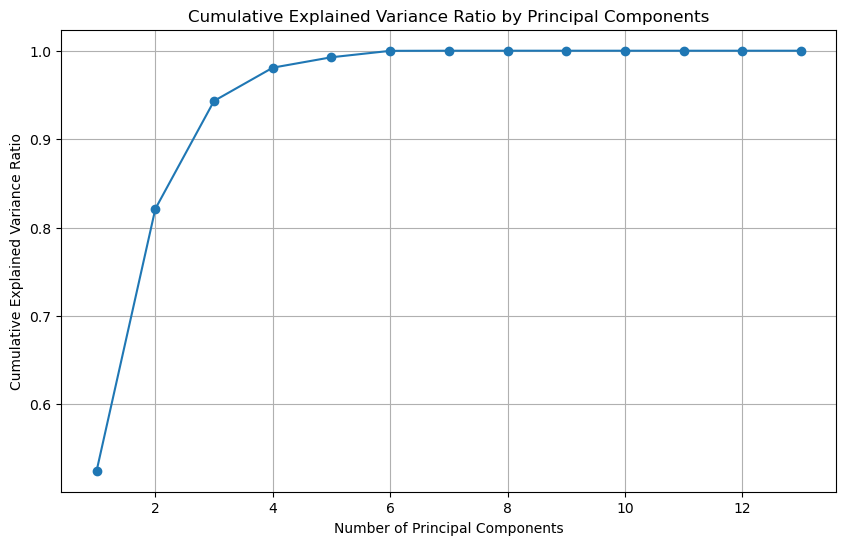

In [ ]:
# Using PCA for demention reduction
from sklearn.decomposition import PCA
import pandas as pd

# Abnomal Data
abnomalies = detection_data[detection_data['outlier'] == True]


# Standarlize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(abnomalies[columns])

# PCA
pca = PCA()
pca.fit(scaled_data)

# Cumulative vairance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [ ]:
# Optimal number of components is 3
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


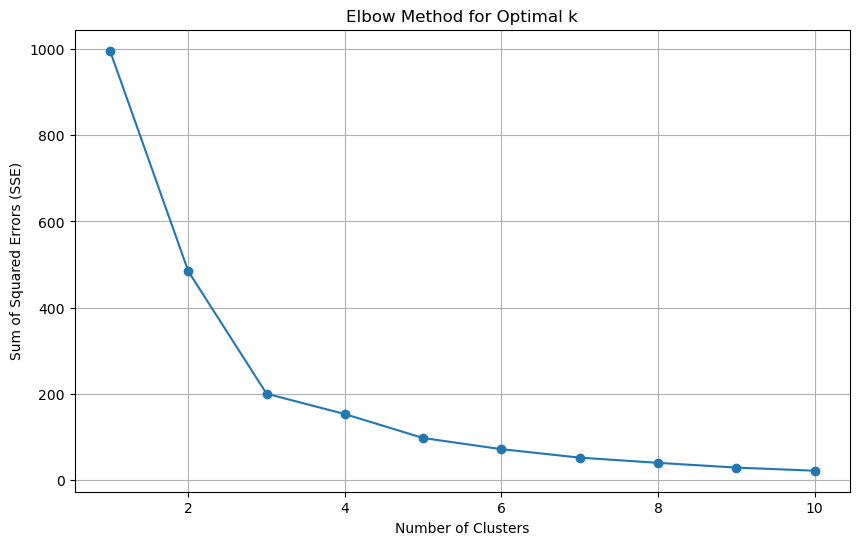

In [ ]:
#Cluster analysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ELBOW method to get optimal cluster number
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2000)
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/p3/jjp2dcm14lvfdvj54q_s4g080000gn/T/ipykernel_92933/2015348330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnomalies['cluster'] = kmeans.fit_predict(principal_components)
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/

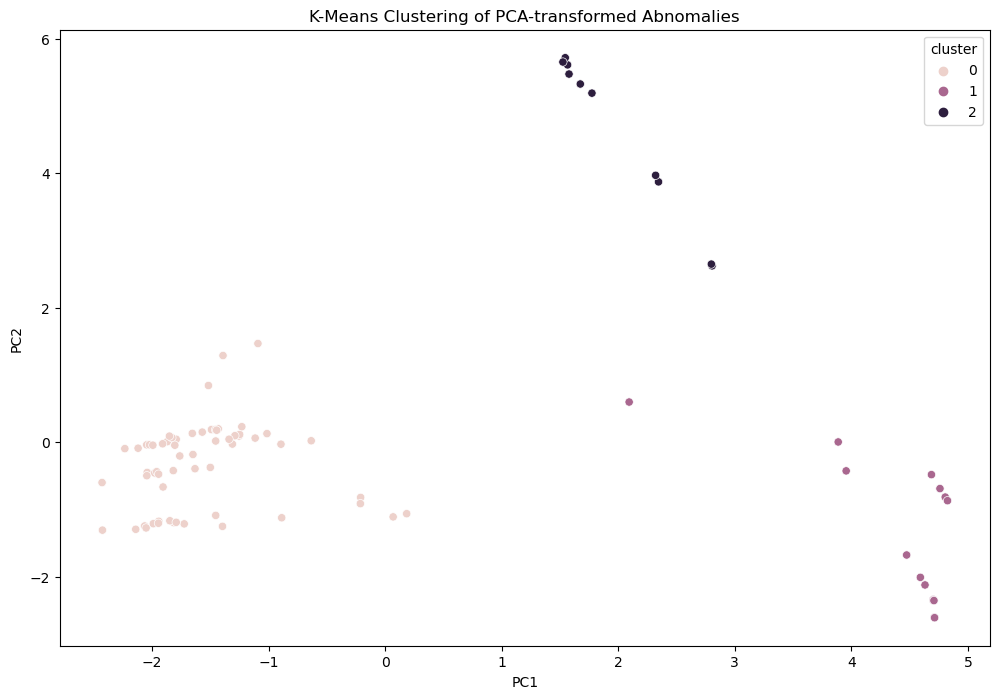

In [ ]:
# Optimal k is 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=2000)
abnomalies['cluster'] = kmeans.fit_predict(principal_components)

# Visualization in 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster')
plt.title('K-Means Clustering of PCA-transformed Abnomalies')
plt.show()

In [ ]:
# Cheack points data in each clusters
for cluster in range(optimal_k):
    cluster_data = abnomalies[abnomalies['cluster'] == cluster]
    print(f"Cluster {cluster} data points:")
    print(cluster_data)
    print("\n")


Cluster 0 data points:
                     Electricity:Facility [kW](Hourly)  \
formatted_timestamp                                      
06/08 15:00:00                                2.239011   
06/08 17:00:00                                2.889940   
06/08 18:00:00                                2.797174   
06/09 12:00:00                                2.024615   
06/12 16:00:00                                2.532455   
...                                                ...   
08/31 15:00:00                                2.480951   
08/31 16:00:00                                2.585054   
08/31 17:00:00                                2.884511   
09/01 13:00:00                                2.179378   
09/01 15:00:00                                2.445174   

                     Gas:Facility [kW](Hourly)  \
formatted_timestamp                              
06/08 15:00:00                        0.021274   
06/08 17:00:00                        0.030569   
06/08 18:00:00        

In [ ]:
# Discribe
for cluster in range(optimal_k):
    cluster_data = abnomalies[abnomalies['cluster'] == cluster]
    cluster_mean = cluster_data[columns].mean()
    cluster_std = cluster_data[columns].std()
    print(f"Cluster {cluster} mean values:")
    print(cluster_mean)
    print("\n")
    print(f"Cluster {cluster} standard deviation values:")
    print(cluster_std)
    print("\n")


Cluster 0 mean values:
Electricity:Facility [kW](Hourly)                      2.495487
Gas:Facility [kW](Hourly)                              0.024415
Heating:Electricity [kW](Hourly)                       0.000000
Heating:Gas [kW](Hourly)                               0.000000
Cooling:Electricity [kW](Hourly)                       1.148528
HVACFan:Fans:Electricity [kW](Hourly)                  0.312026
Electricity:HVAC [kW](Hourly)                          1.460553
Fans:Electricity [kW](Hourly)                          0.312026
General:InteriorLights:Electricity [kW](Hourly)        0.065949
General:ExteriorLights:Electricity [kW](Hourly)        0.014207
Appl:InteriorEquipment:Electricity [kW](Hourly)        0.337180
Misc:InteriorEquipment:Electricity [kW](Hourly)        0.354457
Water Heater:WaterSystems:Electricity [kW](Hourly)     0.243545
dtype: float64


Cluster 0 standard deviation values:
Electricity:Facility [kW](Hourly)                      0.302155
Gas:Facility [kW](Hourly)  

/var/folders/p3/jjp2dcm14lvfdvj54q_s4g080000gn/T/ipykernel_92933/2841969657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnomalies['cluster'] = kmeans.labels_
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-p

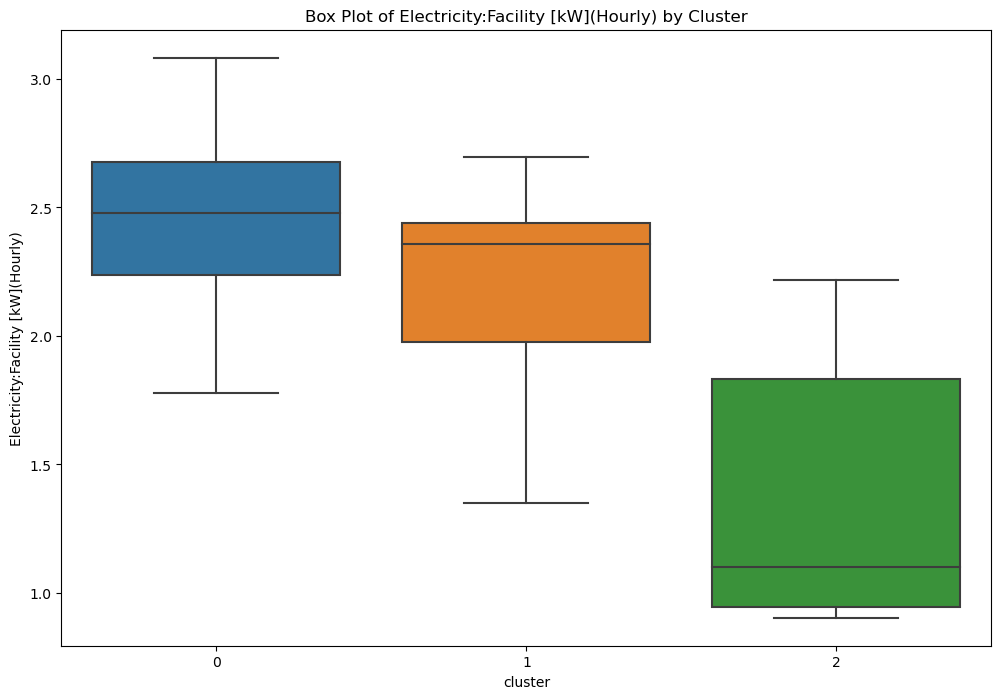

In [ ]:
import seaborn as sns

abnomalies['cluster'] = kmeans.labels_

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster', y='Electricity:Facility [kW](Hourly)', data=abnomalies)
plt.title('Box Plot of Electricity:Facility [kW](Hourly) by Cluster')
plt.show()



/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


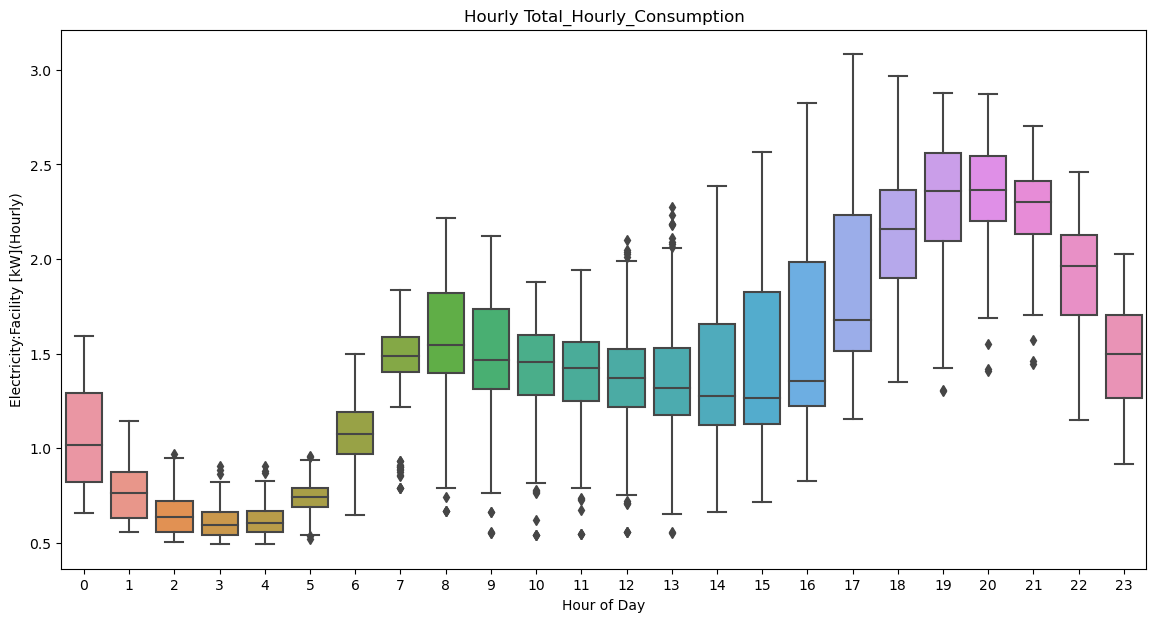

In [ ]:
# Houres
plt.figure(figsize=(14, 7))
sns.boxplot(x='hour', y='Electricity:Facility [kW](Hourly)', data=complete_df)
plt.title('Hourly Total_Hourly_Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Electricity:Facility [kW](Hourly)')
plt.show()

/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


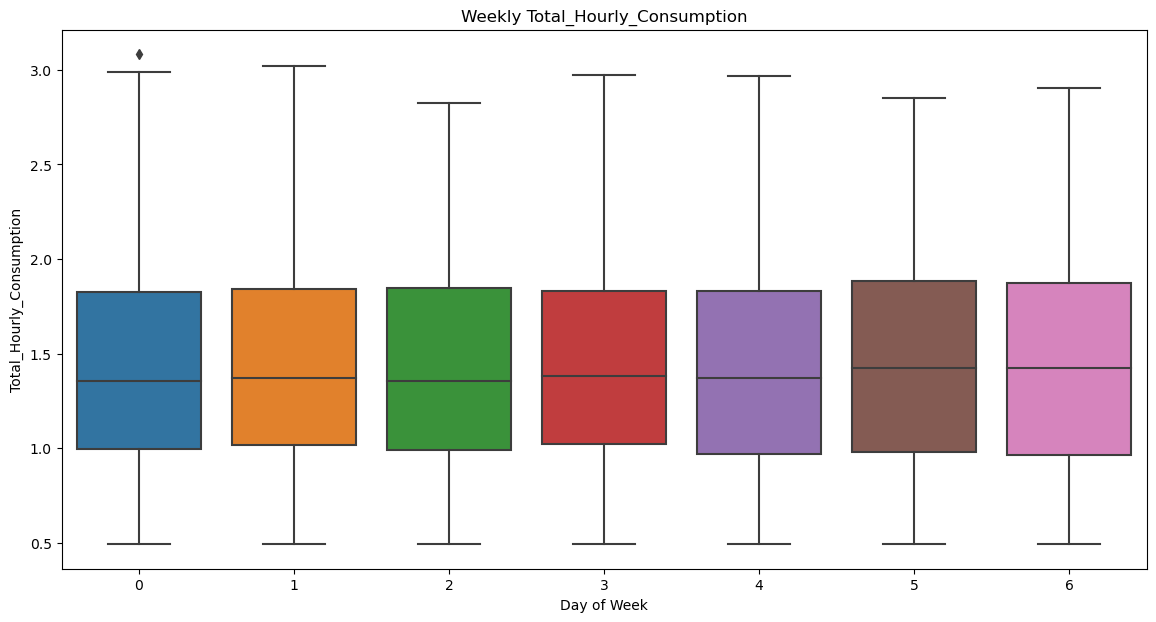

In [ ]:
# Weekday
plt.figure(figsize=(14, 7))
sns.boxplot(x='weekday', y='Electricity:Facility [kW](Hourly)', data=complete_df)
plt.title('Weekly Total_Hourly_Consumption')
plt.xlabel('Day of Week')
plt.ylabel('Total_Hourly_Consumption')
plt.show()

/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


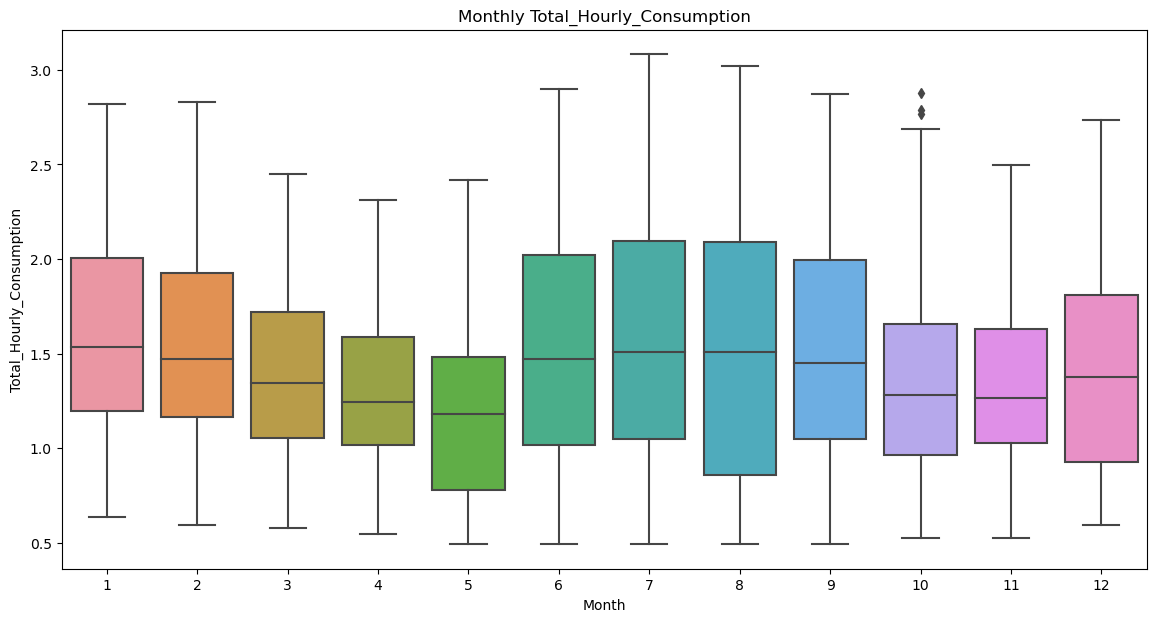

In [ ]:
# Month
plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='Electricity:Facility [kW](Hourly)', data=complete_df)
plt.title('Monthly Total_Hourly_Consumption')
plt.xlabel('Month')
plt.ylabel('Total_Hourly_Consumption')
plt.show()

## Resident part

In [ ]:
valid_kW = complete_df[complete_df['kW'].notna()]



In [ ]:
valid_kW

,kW,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),hour,weekday,month,Total_Hourly_Consumption
formatted_timestamp,,,,,,,,,,,,,,,,,,
06/07 11:00:00,57.388943,1.479426,0.018757,0.0,0.0,0.347519,0.100007,0.447526,0.100007,0.047163,0.010160,0.360615,0.272322,0.324996,11,2,6,79.897441
06/07 12:00:00,27.227961,1.559733,0.018441,0.0,0.0,0.454263,0.130764,0.585027,0.130764,0.047163,0.010160,0.350008,0.267735,0.282996,12,2,6,51.065016
06/07 13:00:00,111.476298,1.702835,0.019079,0.0,0.0,0.603876,0.169912,0.773789,0.169912,0.047163,0.010160,0.319024,0.276993,0.259063,13,2,6,136.828105
06/07 14:00:00,109.021960,1.859094,0.020153,0.0,0.0,0.752179,0.211629,0.963808,0.211629,0.047163,0.010160,0.294229,0.292590,0.234500,14,2,6,135.919095
06/07 15:00:00,5.773963,2.100629,0.021274,0.0,0.0,0.921579,0.253177,1.174756,0.253177,0.050307,0.010837,0.301026,0.308854,0.238204,15,2,6,34.407785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09/17 19:00:00,0.081495,2.673612,0.034257,0.0,0.0,0.669111,0.206351,0.875462,0.206351,0.412747,0.088917,0.348977,0.497352,0.433512,19,6,9,40.528146
09/17 20:00:00,0.081474,2.802815,0.035435,0.0,0.0,0.618448,0.190689,0.809137,0.190689,0.616948,0.132907,0.316662,0.514451,0.396065,20,6,9,41.705721
09/17 21:00:00,0.082655,2.605447,0.034608,0.0,0.0,0.566775,0.173302,0.740077,0.173302,0.573501,0.123547,0.302602,0.502440,0.346635,21,6,9,42.224892


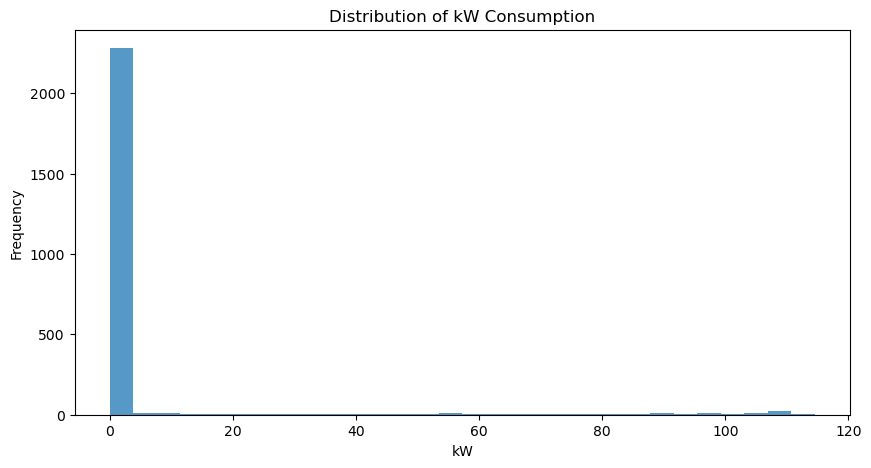

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(valid_kW['kW'], bins=30, alpha=0.75)
plt.title('Distribution of kW Consumption')
plt.xlabel('kW')
plt.ylabel('Frequency')
plt.show()

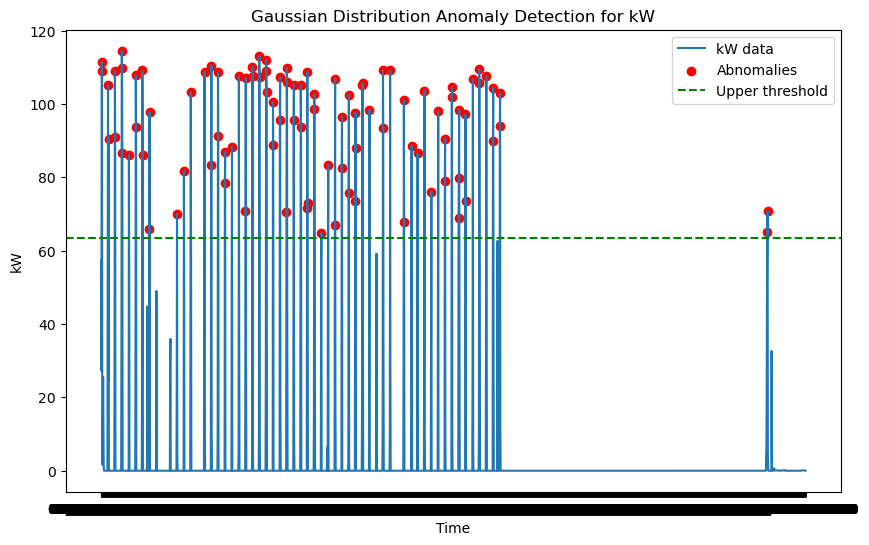

Detected 96 abnomalies
formatted_timestamp
06/07 13:00:00    111.476298
06/07 14:00:00    109.021960
06/08 11:00:00    105.125872
06/08 13:00:00     90.371892
06/09 11:00:00    108.994766
                     ...    
08/03 12:00:00    104.408491
08/04 11:00:00     93.866610
08/04 12:00:00    102.891698
09/12 09:00:00     65.196194
09/12 10:00:00     70.753791
Name: kW, Length: 96, dtype: float64


In [ ]:
#anomal detection
kW_data = valid_kW['kW']
# Mean and Std
mean = kW_data.mean()
std = kW_data.std()
# Set trreshold
threshold = 3  #Over 3 Std would be seen as abnomal point
# Abnomal point
abnomalies = kW_data[np.abs(kW_data - mean) > threshold * std]

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(kW_data.index, kW_data, label='kW data')
plt.scatter(abnomalies.index, abnomalies, color='red', label='Abnomalies')
plt.axhline(mean + threshold * std, color='green', linestyle='--', label='Upper threshold')
plt.title('Gaussian Distribution Anomaly Detection for kW')
plt.xlabel('Time')
plt.ylabel('kW')
plt.legend()
plt.show()

print(f"Detected {len(abnomalies)} abnomalies")
print(abnomalies)


In [ ]:
# Get the anomal points data
abnomalies_df = valid_kW.loc[abnomalies.index]

# Discrible
abnomalies_mean = abnomalies_df['kW'].mean()
abnomalies_std = abnomalies_df['kW'].std()
print(f"Abnomalies mean: {abnomalies_mean}")
print(f"Abnomalies standard deviation: {abnomalies_std}")

# Abnomal time slot
print("Abnomalies time periods:")
print(abnomalies_df.index,abnomalies_df['kW'])


Abnomalies mean: 94.76617510632605
Abnomalies standard deviation: 14.115160733277483
Abnomalies time periods:
Index(['06/07 13:00:00', '06/07 14:00:00', '06/08 11:00:00', '06/08 13:00:00',
       '06/09 11:00:00', '06/09 12:00:00', '06/10 11:00:00', '06/10 12:00:00',
       '06/10 13:00:00', '06/11 12:00:00', '06/12 12:00:00', '06/12 13:00:00',
       '06/13 11:00:00', '06/13 12:00:00', '06/14 11:00:00', '06/14 12:00:00',
       '06/18 12:00:00', '06/19 12:00:00', '06/20 12:00:00', '06/22 12:00:00',
       '06/23 11:00:00', '06/23 12:00:00', '06/24 11:00:00', '06/24 12:00:00',
       '06/25 11:00:00', '06/25 12:00:00', '06/26 12:00:00', '06/27 12:00:00',
       '06/28 11:00:00', '06/28 12:00:00', '06/29 11:00:00', '06/29 12:00:00',
       '06/30 11:00:00', '06/30 12:00:00', '07/01 11:00:00', '07/01 12:00:00',
       '07/01 13:00:00', '07/02 11:00:00', '07/02 12:00:00', '07/03 11:00:00',
       '07/03 12:00:00', '07/04 10:00:00', '07/04 11:00:00', '07/04 12:00:00',
       '07/05 11:00:0

/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


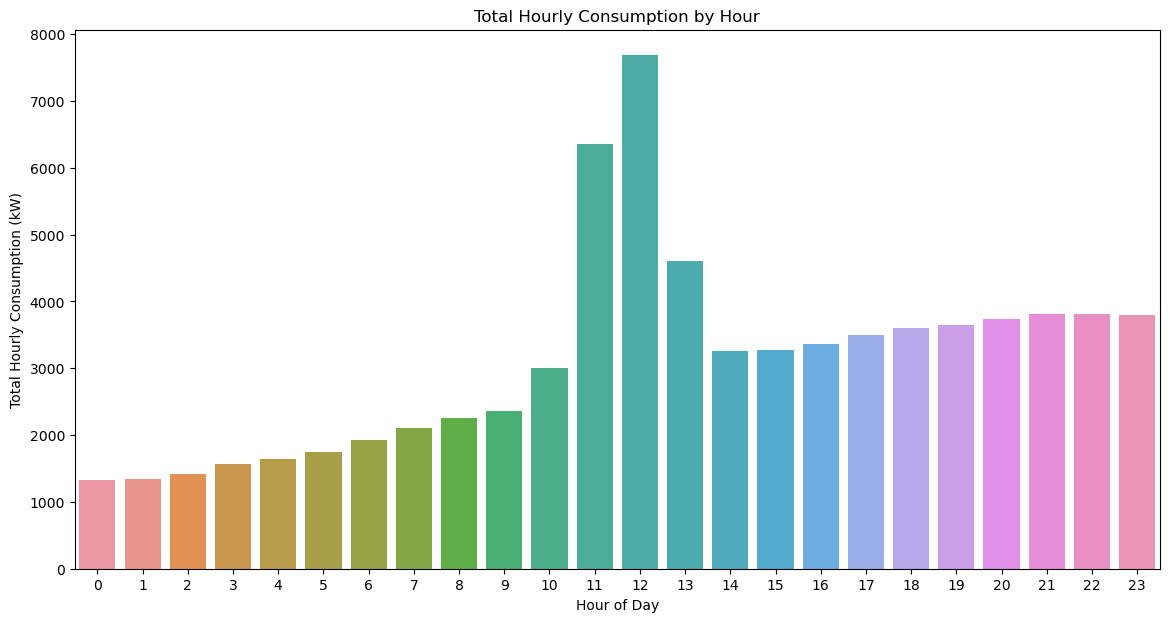

In [ ]:
# Hour
hourly_grouped = valid_kW.groupby('hour')['Total_Hourly_Consumption'].sum()

plt.figure(figsize=(14, 7))
sns.barplot(x=hourly_grouped.index, y=hourly_grouped.values)
plt.title('Total Hourly Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Hourly Consumption (kW)')
plt.show()

/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


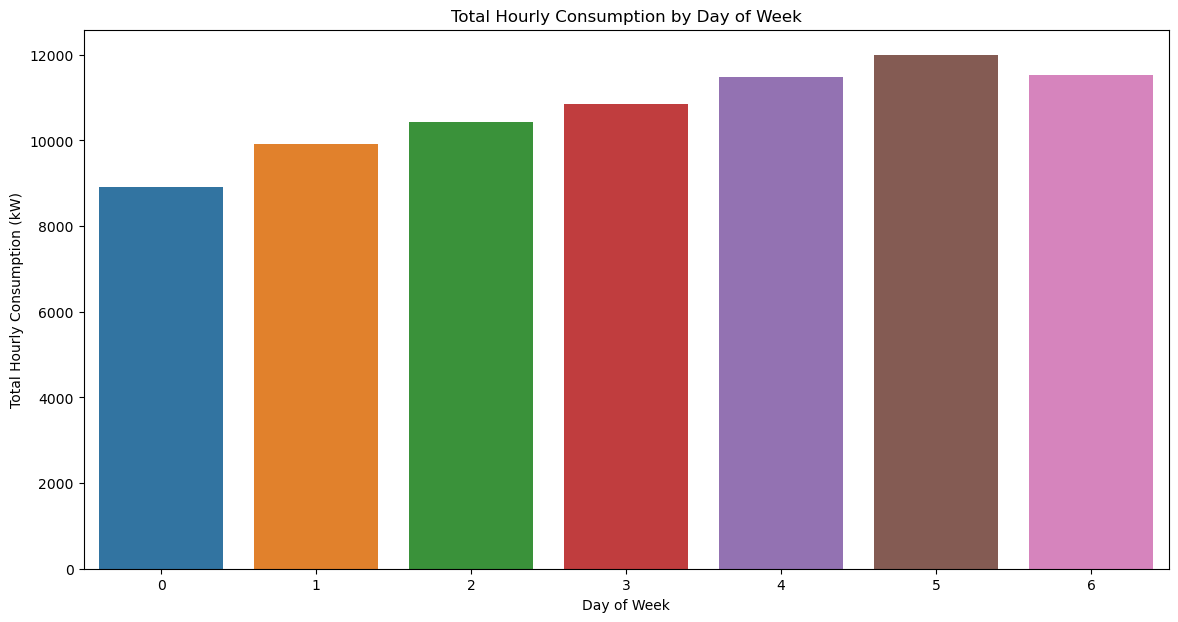

In [ ]:
# Week
weekly_grouped = valid_kW.groupby('weekday')['Total_Hourly_Consumption'].sum()

plt.figure(figsize=(14, 7))
sns.barplot(x=weekly_grouped.index, y=weekly_grouped.values)
plt.title('Total Hourly Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Hourly Consumption (kW)')
plt.show()


/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuxianwang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


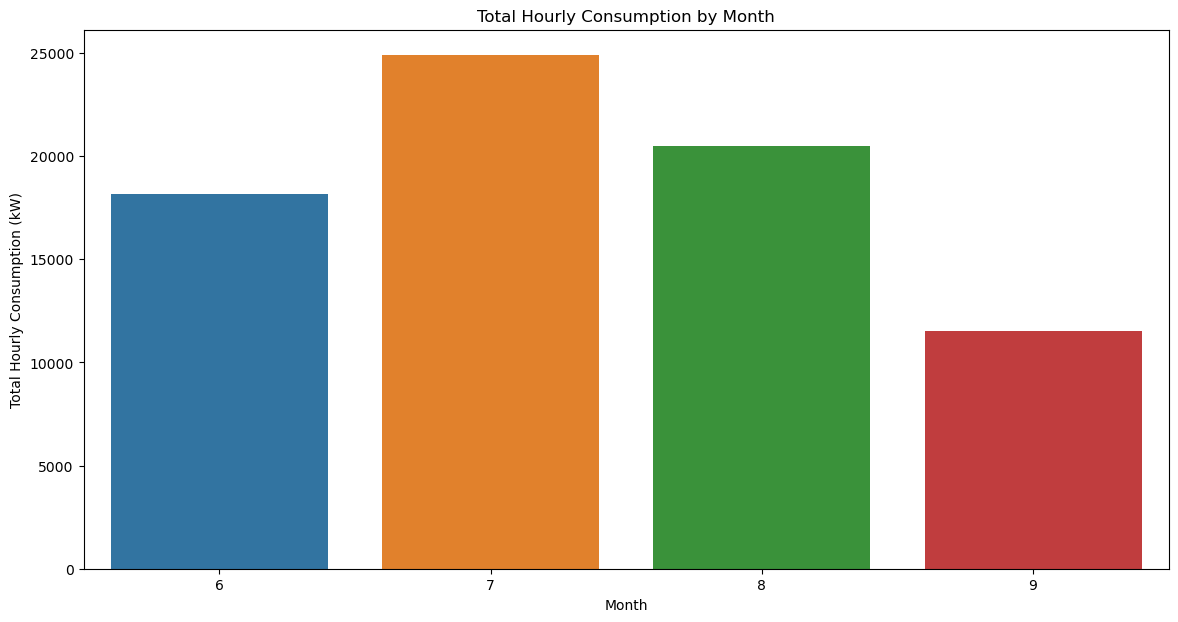

In [ ]:
# Month
monthly_grouped = valid_kW.groupby('month')['Total_Hourly_Consumption'].sum()

plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_grouped.index, y=monthly_grouped.values)
plt.title('Total Hourly Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Total Hourly Consumption (kW)')
plt.show()
